In [24]:
import re

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor

In [25]:
df = pd.read_csv("data60.csv", low_memory=True, parse_dates=['ut_ms'])
df = df.sample(frac=0.009)

/var/folders/nt/d84s2rjx7cqf7p48l6btqq280000gn/T/ipykernel_45662/215523502.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,481,482,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data60.csv", low_memory=True, parse_dates=['ut_ms'])


In [26]:
df = df.replace(to_replace='?', value=0)
df = df.apply(pd.to_numeric)
df = df.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

In [27]:
df = df.fillna(0)

In [5]:
# df['date'] = pd.to_datetime(df['ut_ms'], unit='ms')
# df.drop('ut_ms', axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 2401 to 27991
Columns: 518 entries, ut_ms to NPWD2882
dtypes: float64(152), int64(366)
memory usage: 2.4 MB


In [34]:
df.head()

,ut_ms,panelsJm2influx,frontJm2influx,backJm2influx,leftJm2influx,rightJm2influx,upJm2influx,downJm2influx,panelssum1Jm2influx_sum,panelssum1decay09Jm2influx_sum,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
2401,1228006860000,2.189148e+09,2.184075e+09,0.0,9.934105e+06,0.000000e+00,1.488970e+08,0.000000e+00,2.188989e+09,1.970090e+09,...,0.000594,0.001532,0.159098,0.005744,0.005226,0.000530,0.000527,0.000746,0.006939,0.003457
46534,1386885660000,1.776343e+09,1.531657e+09,0.0,6.910445e+06,0.000000e+00,0.000000e+00,8.996352e+08,1.775682e+09,1.598114e+09,...,0.001408,0.001599,0.085901,0.005874,0.636498,0.000528,0.000530,0.000756,0.006847,0.003463
22438,1300140060000,2.571076e+09,2.523063e+09,0.0,5.486351e-08,1.716718e+07,3.120188e+08,8.025341e+07,2.576210e+09,2.318589e+09,...,0.001075,0.001545,0.251356,0.006021,0.350618,0.000547,0.000532,0.000767,0.006861,0.003400
11865,1262077260000,1.663272e+09,8.847876e+08,0.0,3.612519e+08,0.000000e+00,0.000000e+00,1.084597e+09,2.935116e+08,2.641604e+08,...,0.000574,0.001495,0.002307,0.005758,0.263895,0.000526,0.000523,0.000740,0.006771,0.003359
56668,1423368060000,2.492842e+09,2.387430e+09,0.0,1.945134e+07,0.000000e+00,0.000000e+00,7.172676e+08,2.455040e+09,2.209536e+09,...,0.001632,0.001540,0.027847,0.005796,0.207586,0.000526,0.000525,0.000736,0.006781,0.003390


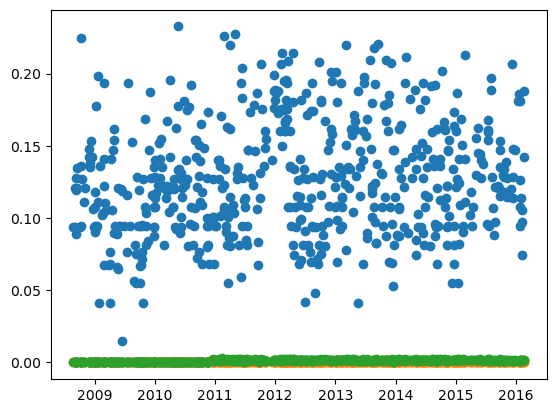

In [45]:
plt.plot_date(pd.to_datetime(df['ut_ms'], unit='ms'), df.NPWD2372)
plt.plot_date(pd.to_datetime(df['ut_ms'], unit='ms'), df.NPWD2852)
plt.plot_date(pd.to_datetime(df['ut_ms'], unit='ms'), df.NPWD2472)

# Models

In [8]:
X = df.iloc[:, 0:485]
y = df.iloc[:, 485:]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

# LogisticRegression

# GradientBoostingRegressor

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = MultiOutputRegressor(GradientBoostingRegressor())
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [11]:
gbr.score(X_train, y_train)

0.9954903107673331

In [12]:
y_pred

array([[0.13573882, 0.00150732, 0.17498363, ..., 0.00074136, 0.00642436,
        0.003368  ],
       [0.13591928, 0.00150944, 0.17547151, ..., 0.00073893, 0.00718842,
        0.00336943],
       [0.12352863, 0.00152955, 0.17490216, ..., 0.00074099, 0.00715429,
        0.00338539],
       ...,
       [0.12471649, 0.00153003, 0.17569825, ..., 0.00074744, 0.00660571,
        0.00343515],
       [0.09750145, 0.00154136, 0.17543672, ..., 0.00075366, 0.00767443,
        0.00338819],
       [0.11522259, 0.00152054, 0.17554481, ..., 0.00073913, 0.00660571,
        0.003314  ]])

# RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor

rfm = MultiOutputRegressor(RandomForestRegressor())
rfm.fit(X_train, y_train)
y_pred = rfm.predict(X_test)

In [14]:
rfm.score(X_train, y_train)

0.8512948360324877

In [15]:
y_pred

array([[0.12221098, 0.00143609, 0.17353271, ..., 0.00072953, 0.00683181,
        0.00334443],
       [0.13618113, 0.00151998, 0.17550904, ..., 0.00074287, 0.00681548,
        0.00338736],
       [0.12069087, 0.00151447, 0.17500481, ..., 0.00073796, 0.00672109,
        0.00335199],
       ...,
       [0.13100495, 0.0015332 , 0.17550819, ..., 0.00074713, 0.00672086,
        0.00337693],
       [0.09758509, 0.00152905, 0.1755362 , ..., 0.00075106, 0.00678888,
        0.00338471],
       [0.12413781, 0.00151799, 0.17538515, ..., 0.00074713, 0.00674231,
        0.00337302]])

# Time series model